## Problem Statement

This project aims to leverage Generative AI to assist visually impaired individuals in perceiving and interacting with their surroundings.
Visually impaired individuals often face challenges in understanding their environment, reading visual content, and performing tasks that rely on sight.

There is a need for an intelligent, adaptable, and user-friendly solution that provides:
- Real-time scene understanding.
- Text-to-speech conversion for reading visual content.
- Object and obstacle detection for safe navigation.
- Personalized assistance for daily tasks.


### Real-Time Scene Understanding

Generate descriptive textual output that interprets the content of the uploaded image, enabling users to understand the scene effectively.


In [ ]:
import google.generativeai as genai
import os
from dotenv import load_dotenv
from PIL import Image

In [7]:
load_dotenv()

True

In [11]:
key = os.environ["Gemini_API_KEY"] 

In [16]:
genai.configure(api_key=key)

In [19]:
for i in genai.list_models():
    print(i.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/learnlm-1.5-pro-experimental
models/gemini-exp-1114
models/gemini-exp-1121
models/embedding-001
models/text-embedding-004
models/aqa


In [26]:
model = genai.GenerativeModel(model_name = "models/gemini-1.5-flash-latest")

config = genai.GenerationConfig(temperature=0.2)





response = model.generate_content("what is data science",generation_config=config)
print(response.text)

Data science is an interdisciplinary field that uses scientific methods, processes, algorithms, and systems to extract knowledge and insights from structured and unstructured data.  It combines aspects of:

* **Mathematics and Statistics:**  Used for modeling, analyzing, and interpreting data. This includes probability, statistical inference, regression analysis, and more.

* **Computer Science:**  Provides the tools and techniques for data storage, retrieval, processing, and visualization. This involves programming languages like Python and R, database management, and algorithm design.

* **Domain Expertise:**  Understanding the context of the data is crucial.  A data scientist needs to know something about the field the data comes from (e.g., finance, healthcare, marketing) to ask the right questions and interpret the results meaningfully.

In essence, data scientists use their skills to:

* **Collect data:** From various sources, both internal and external to an organization.
* **Cl

In [30]:
import matplotlib.pyplot as plt

Here's a description of the image:

The image shows a fluffy, light brown Cocker Spaniel puppy and a ginger kitten sitting close together against a light brown background.  The kitten is licking the puppy's nose. Both animals appear young and are positioned in a way that suggests affection or playful interaction. The overall tone of the image is cute and heartwarming.



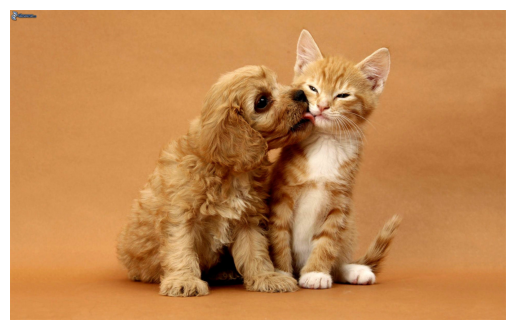

In [42]:
image = Image.open("C:\\Users\\solmo\\Downloads\\dog-and-cat-cocker-spaniel-puppy-small-ginger-kitten-kiss.jpg")


prompt = "Generate a image to text with brief understanding of image"

output = model.generate_content([prompt,image],generation_config=config)
plt.imshow(image)
plt.axis("off")

print(output.text)

## Text-to-Speech Conversion for Visual Content


Extract text from the uploaded image using OCR techniques and convert it into audible speech for seamless content accessibility.


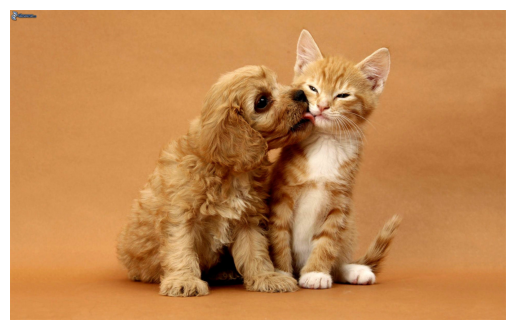

Here's a description of the image:

The image shows a fluffy, light brown Cocker Spaniel puppy and a ginger kitten sitting close together against a light brown background.  The kitten is licking the puppy's nose. Both animals appear young and are positioned in a way that suggests affection or playful interaction. The overall tone is cute and heartwarming.



In [43]:
def generate_iamge_content(image_path,model,config):

    try:
        image = Image.open(image_path)
        prompt = "Generate a image to text with brief understanding of image"
        config = genai.GenerationConfig(temperature=0.2)
        output = model.generate_content([prompt,image],generation_config=config)
        plt.imshow(image)
        plt.axis("off")
        plt.show()
        return output.text
    except FileNotFoundError:
        print(f"Error: Image file not found at '{image_path}'.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None
if __name__ == "__main__":
    image_path = "C:\\Users\\solmo\\Downloads\\dog-and-cat-cocker-spaniel-puppy-small-ginger-kitten-kiss.jpg"
    description = generate_iamge_content(image_path=image_path,model=model,config=config)
    if description:
        import pyttsx3
        engine = pyttsx3.init()
        try:
        # Ensure the loop isn't already running
           if engine._inLoop:
              
              engine.endLoop()
            
              engine.say(description)
              engine.runAndWait()
        except RuntimeError as e:
              print(f"Runtime error with pyttsx3: {e}")
        finally:
            engine.stop()

        print(description)





## Object and Obstacle Detection for Safe Navigation
- Identify objects or obstacles within the image and highlight them, offering insights to enhance user safety and situational awareness.


In [54]:
import cv2
#import torch
from ultralytics import YOLO


# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# load image

img = cv2.imread("C:\\Users\\solmo\\Downloads\\dog-and-cat-cocker-spaniel-puppy-small-ginger-kitten-kiss.jpg")

# Perform object detection
results = model(img)

# Visualize the results
for result in results:
    annotated_frame = result.plot()
    cv2.imshow('Object Detection', annotated_frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


0: 416x640 1 cat, 2 dogs, 1 teddy bear, 73.7ms
Speed: 4.1ms preprocess, 73.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)
